# CBPSO para el mapa logístico simple

Además de optimizar para Rosenbrock, se realiza una prueba sobre el mapa logístico simple, recreando el artículo de Sheludko (2022)

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.8043853376990393, 0.30039797144537167]
Optimized MSE objective function: 4.3611458001652215e-05


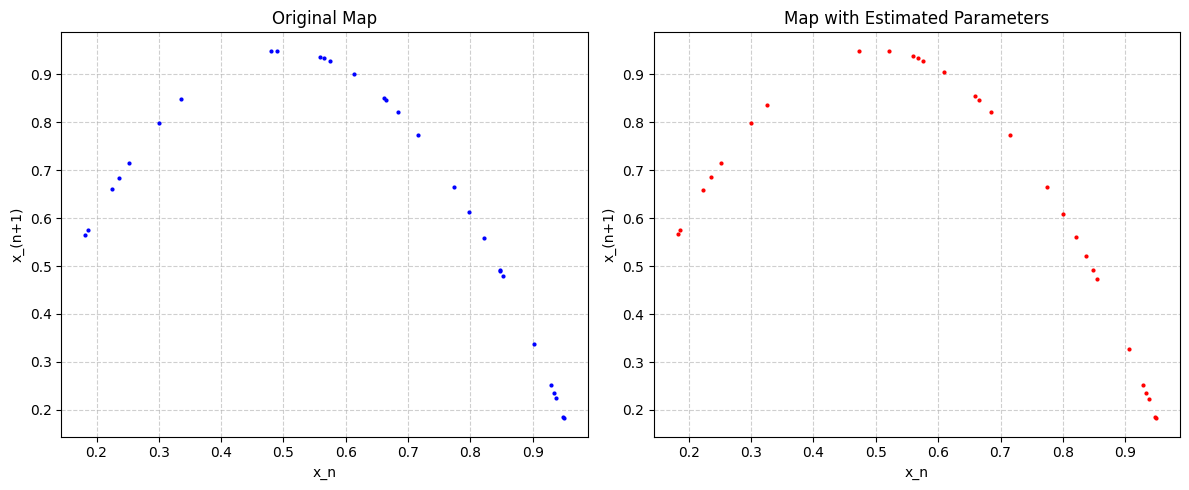

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.800409426585948, 0.40850833325885433]
Optimized MSE objective function: 0.008552096128125077


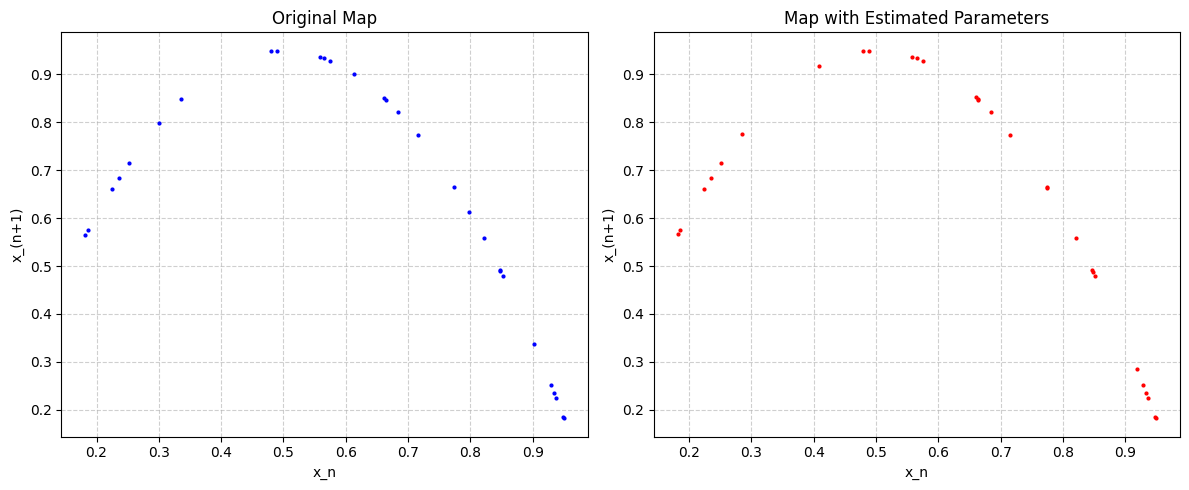

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.7998437124535642, 0.6318403142741762]
Optimized MSE objective function: 0.005586863889118721


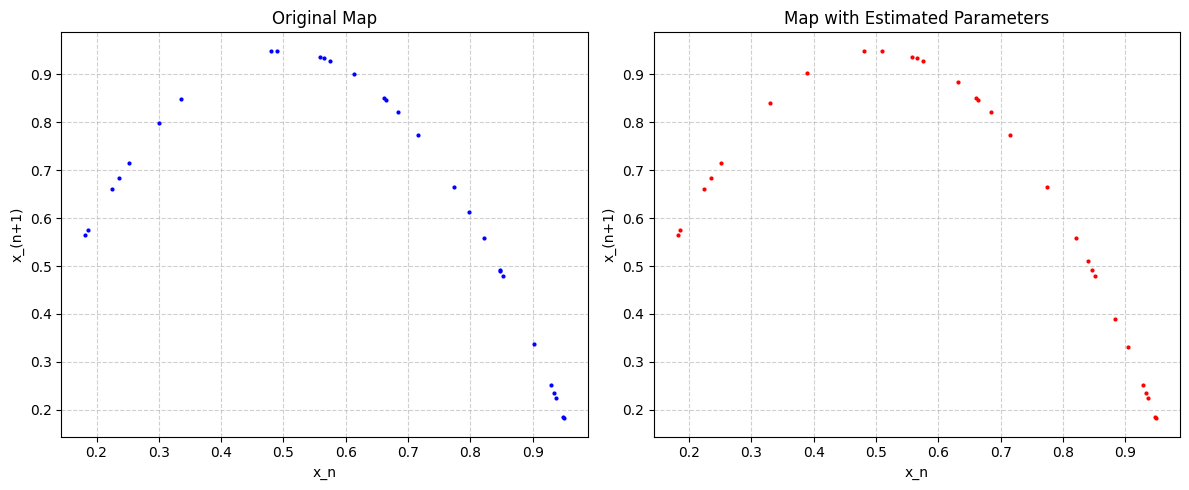

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.799168373164625, 0.36835842521559015]
Optimized MSE objective function: 0.0020706852379210284


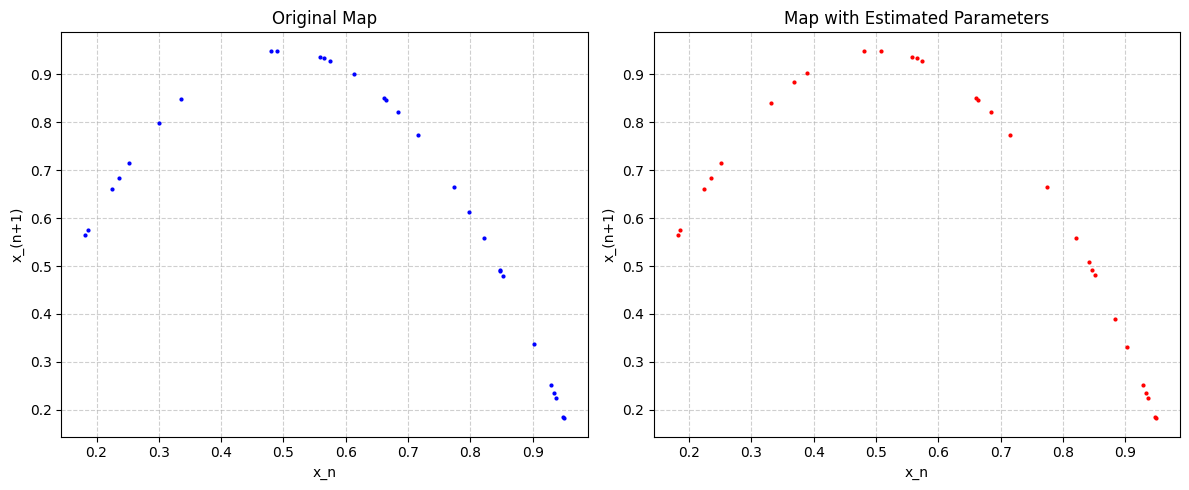

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.7984334625248124, 0.6312859009328946]
Optimized MSE objective function: 0.005575774899247194


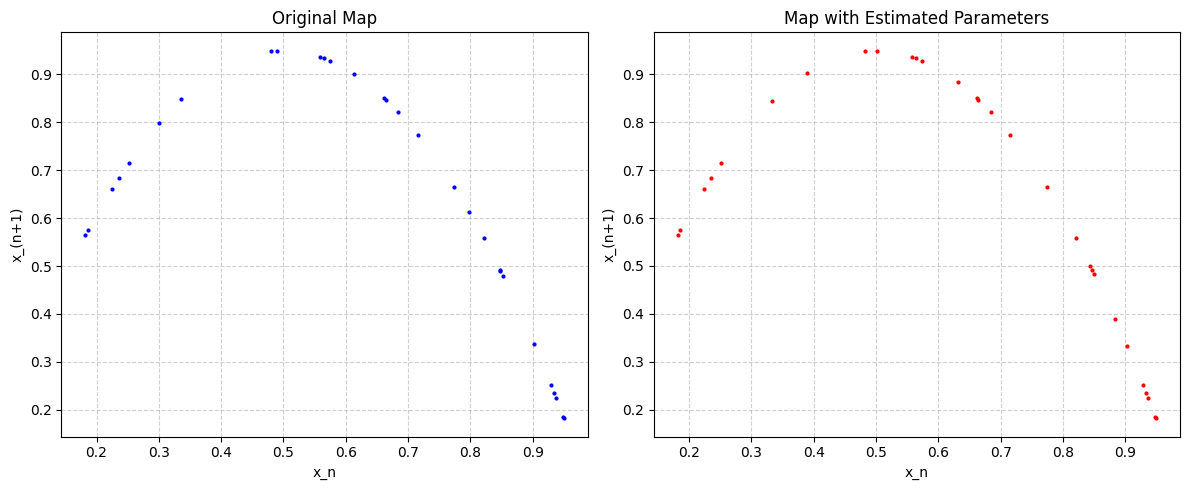

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.7995713945589884, 0.300115734669866]
Optimized MSE objective function: 1.2993942190591391e-07


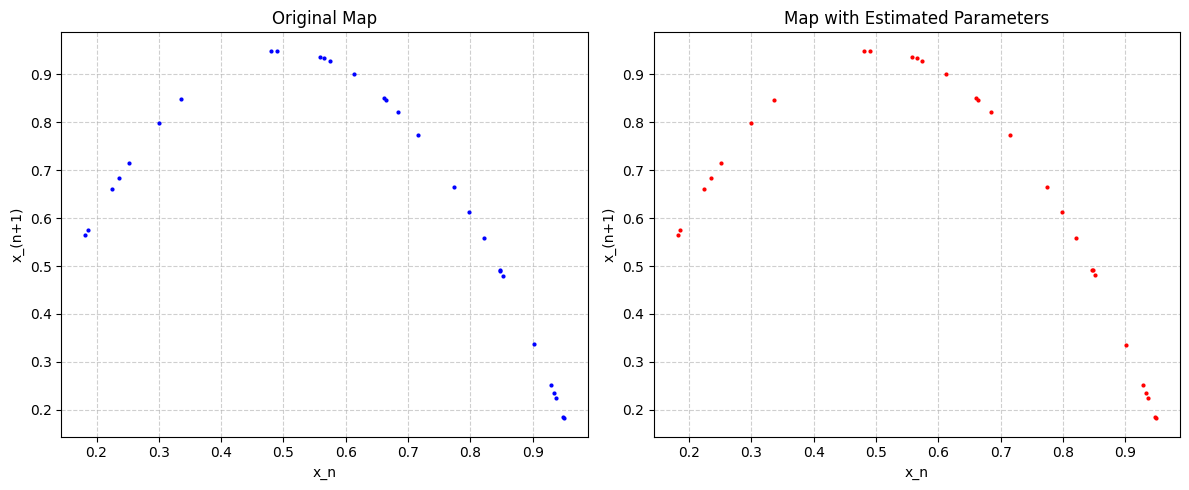

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.807864272166741, 0.36652065180577925]
Optimized MSE objective function: 0.0021062505002776145


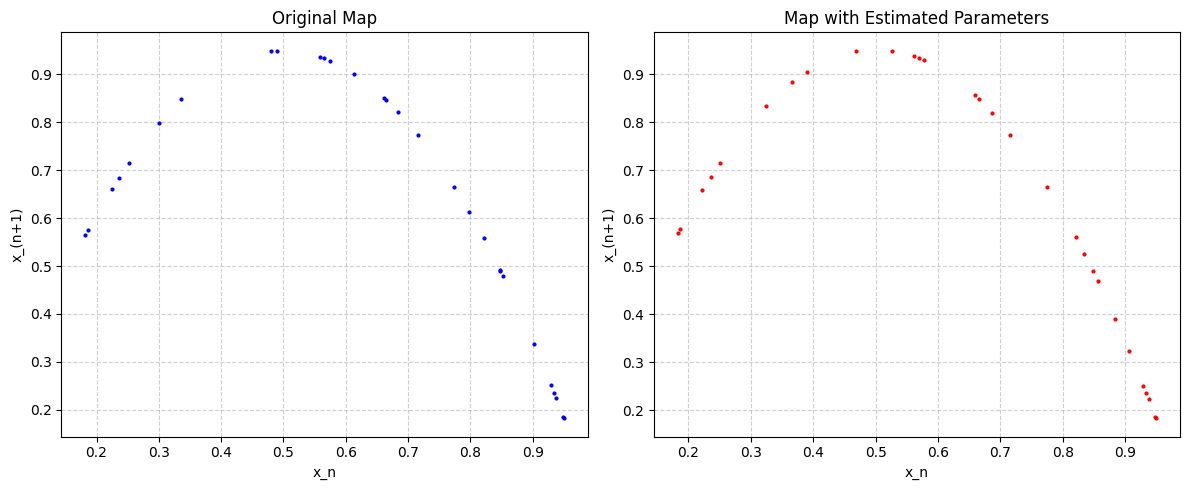

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.8135143980684316, 0.2973461870776569]
Optimized MSE objective function: 3.546287806990816e-05


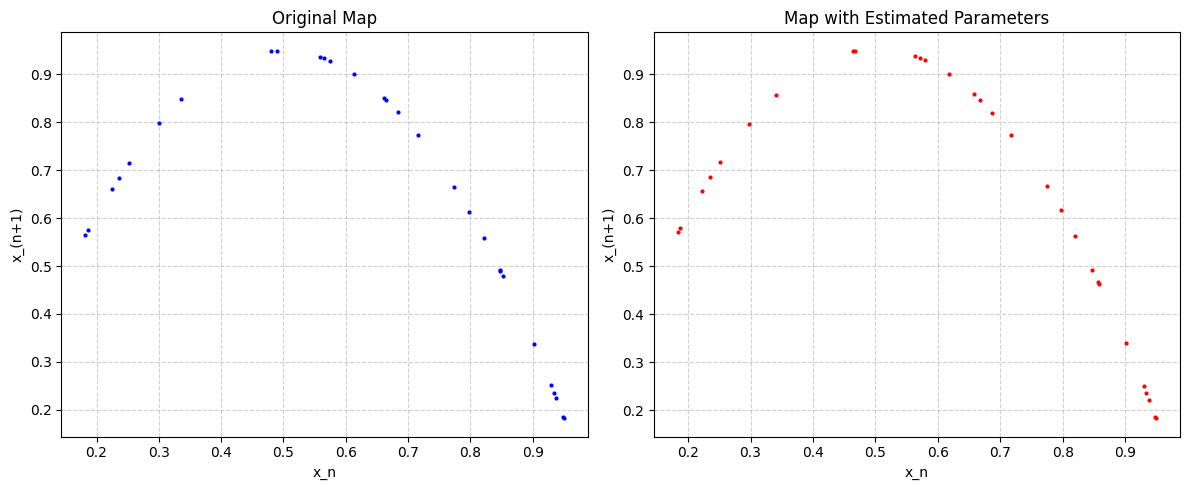

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.799602276899119, 0.36896430411002434]
Optimized MSE objective function: 0.0020941691061300664


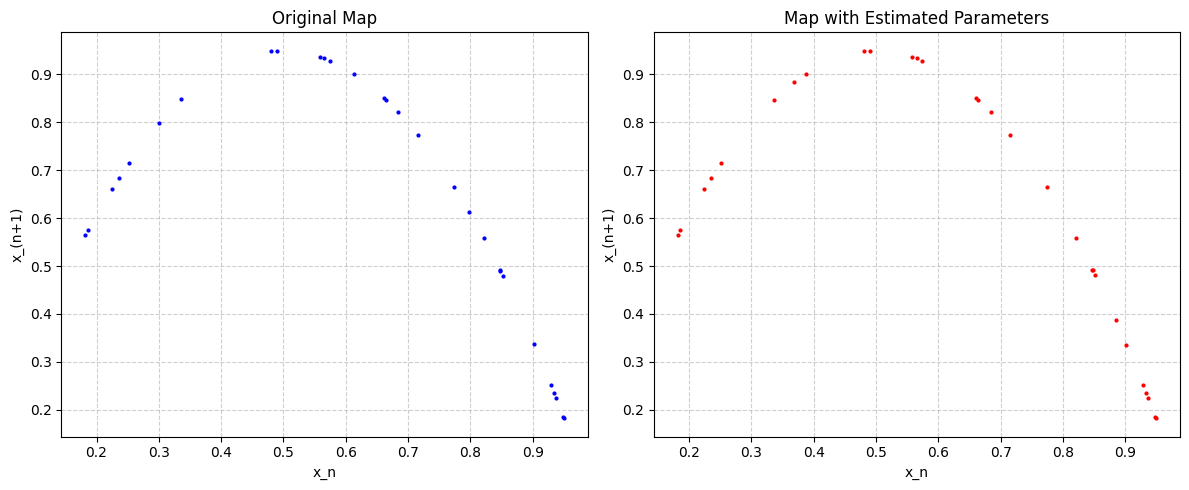

Parametros reales: [3.8, 0.3]
FINAL:
Optimal value of r: [3.7986605861880687, 0.36888528803132514]
Optimized MSE objective function: 0.002082428623477801


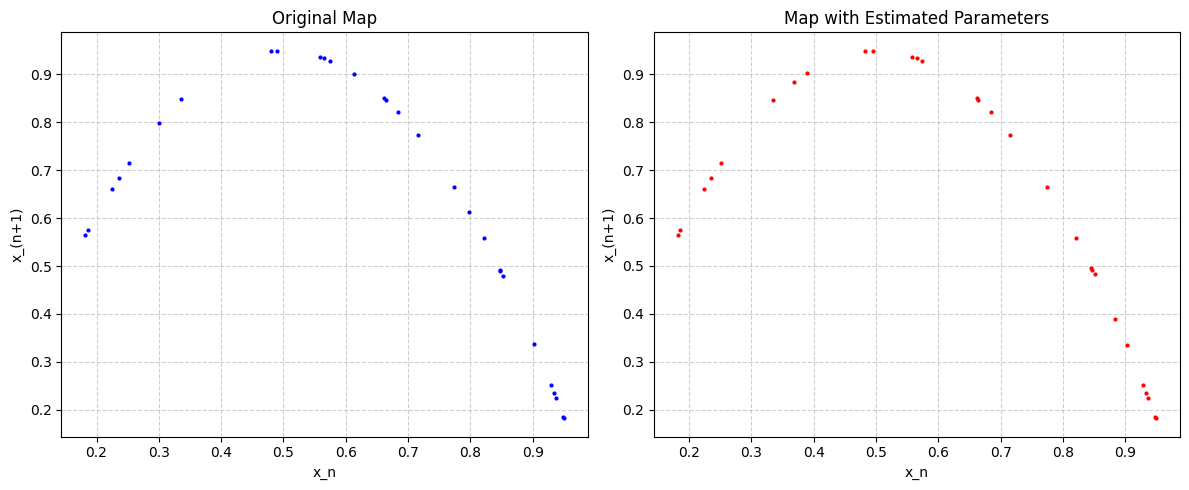

Después de 10 iteraciones en 32.5838 s


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time as t
import math
from math import exp
import statistics as s


def log_map(v, r):
    return r * v * (1 - v)

def sim_mapa(params, iterations=30):
    r, x0 = params
    x = [x0]

    for i in range(1, iterations):
        xn = log_map(x[i - 1], r) % 1
        x.append(xn)
    return np.array(x)

# Function to minimize
def func1(params):
    iterations = 30
    estimated_output = sim_mapa(params)
    error = 1/iterations * np.sum((true_output - estimated_output) ** 2)
    return error

#--- MAIN ---------------------------------------------------------------------+
#Utilicé el código de Nathan Rooy de plantilla para aprender sobre el algoritmo
class Particle:
    def __init__(self):
        self.position_i = [random.uniform(0.1, 1) for _ in range(num_dimensions)]  # Random initial position
        self.velocity_i = [random.uniform(-1, 1) for _ in range(num_dimensions)]   # Random initial velocity
        self.pos_best_i = []       # Best individual position
        self.err_best_i = -1       # Best individual error
        self.err_i = -1            # Current error

    # Evaluate the current fitness
    def evaluate(self, costFunc):
        self.err_i = costFunc(self.position_i)

        # Check if the current position is the best individual position
        if self.err_i < self.err_best_i or self.err_best_i == -1:
            self.pos_best_i = list(self.position_i)
            self.err_best_i = self.err_i

    # Update velocity
    def update_velocity(self, pos_best_g, w):
        c1 = 0.5  # Cognitive constant
        c2 = 0.5  # Social constant

        for i in range(num_dimensions):
            r1 = random.random()
            r2 = random.random()

            vel_cognitive = c1 * r1 * (self.pos_best_i[i] - self.position_i[i])
            vel_social = c2 * r2 * (pos_best_g[i] - self.position_i[i])
            self.velocity_i[i] = w * self.velocity_i[i] + vel_cognitive + vel_social

    # Update position
    def update_position(self, bounds):
        for i in range(num_dimensions):
            self.position_i[i] += self.velocity_i[i]

            # Clamp position within bounds
            if self.position_i[i] > bounds[i][1]:
                self.position_i[i] = bounds[i][1]
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]

class PSO:
    def __init__(self, costFunc, bounds, num_particles, maxiter):
        global num_dimensions
        num_dimensions = len(bounds)
        self.err_best_g = -1  # Global best error
        pos_best_g = []       # Global best position

        # Create swarm
        swarm = [Particle() for _ in range(num_particles)]

        # Optimization loop
        for i in range(maxiter):
            w_max = 0.9
            w_min = 0.2
            p = 100
            w = (w_max - w_min) * exp(-p * (i / maxiter) ** 2) + w_min#w_max-(w_max-w_min)/maxiter*i 

            for particle in swarm:
                particle.evaluate(costFunc)
                if particle.err_i < self.err_best_g or self.err_best_g == -1:
                    pos_best_g = list(particle.position_i)
                    self.err_best_g = particle.err_i

            for particle in swarm:
                particle.update_velocity(pos_best_g, w)
                particle.update_position(bounds)

        self.best_position = pos_best_g
        print('FINAL:')
        print('Optimal value of r:', self.best_position)
        print('Optimized MSE objective function:', self.err_best_g)

def graficar_mapas(true_output, estimated_output):
    plt.figure(figsize=(12, 5))

    #Mapa Original
    plt.subplot(1, 2, 1)
    plt.plot(true_output[:-1], true_output[1:], 'o', markersize=2, color='blue')
    plt.title('Original Map')
    plt.xlabel('x_n')
    plt.ylabel('x_(n+1)')
    plt.grid(True, linestyle='--', alpha=0.6)

    #Mapa Estimado
    plt.subplot(1, 2, 2)
    plt.plot(estimated_output[:-1], estimated_output[1:], 'o', markersize=2, color='red')
    plt.title('Map with Estimated Parameters')
    plt.xlabel('x_n')
    plt.ylabel('x_(n+1)')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

#--- RUN ----------------------------------------------------------------------+
true_params = [3.8, 0.3]
true_output = sim_mapa(true_params)
bounds = [(3.57, 4), (0.1, 1)]
ciclos = 10
temp_inicial = t.time()
for i in range(ciclos):
    print(f'Parametros reales: {true_params}')
    pso = PSO(func1, bounds, num_particles=300, maxiter=500)
    estimated_output = sim_mapa(pso.best_position)
    graficar_mapas(true_output, estimated_output)
temp_final = t.time()
temp_neto = round(temp_final-temp_inicial,4)
print(f"Después de {ciclos} iteraciones en {temp_neto} s")